In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df.describe(include = 'all')

,Unnamed: 0,headline,url,publisher,date,stock
count,1.407328e+06,1407328,1407328,1407328,1407328,1407328
unique,NaN,845770,883429,1034,39957,6204
top,NaN,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,NaN,5449,1704,228373,1766,3333
mean,7.072454e+05,NaN,NaN,NaN,NaN,NaN
std,4.081009e+05,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,3.538128e+05,NaN,NaN,NaN,NaN,NaN
50%,7.072395e+05,NaN,NaN,NaN,NaN,NaN
75%,1.060710e+06,NaN,NaN,NaN,NaN,NaN


In [26]:
df['headline'].dtype

dtype('O')

In [4]:
df['headline_length'] = df['headline'].str.len()
df['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [33]:
df['publisher'].value_counts() #list out publisher from top to bottom

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

<Axes: xlabel='publisher'>

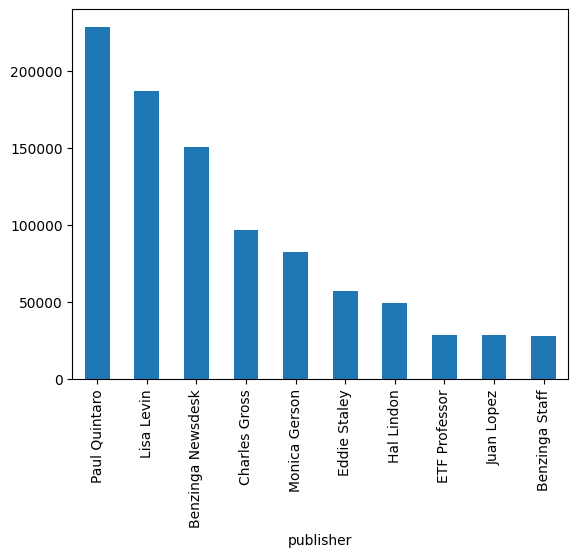

In [35]:
df['publisher'].value_counts().head(10).plot(kind='bar')

In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

<Axes: xlabel='date'>

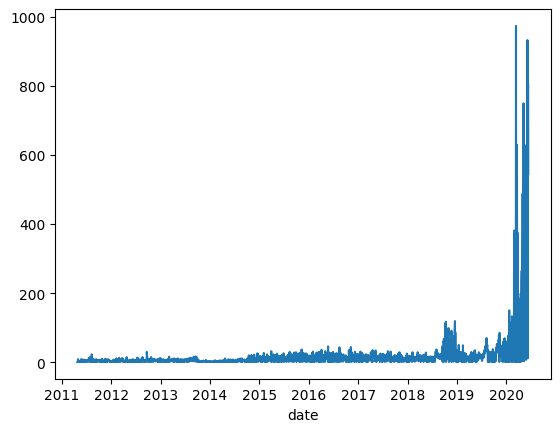

In [11]:
df['date'].dt.date.value_counts().sort_index().plot()

In [14]:
df['date'].dt.date.value_counts().head(15)

date
2020-03-12    973
2020-06-05    932
2020-06-10    806
2020-06-09    804
2020-06-08    765
2020-05-07    749
2020-06-03    720
2020-03-19    629
2020-05-26    628
2020-05-13    549
2020-05-18    547
2020-06-11    544
2020-06-04    538
2020-05-14    536
2020-05-06    531
Name: count, dtype: int64

<Axes: xlabel='date'>

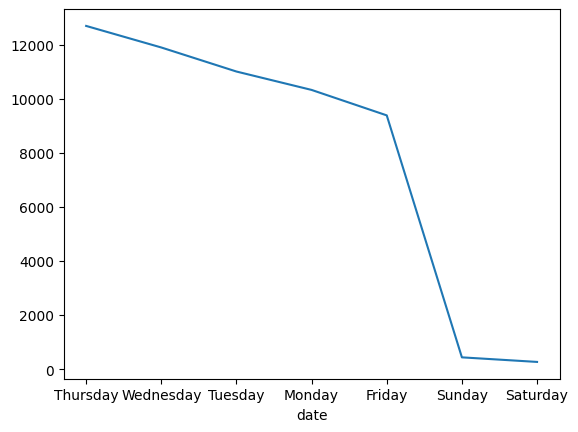

In [15]:
df['date'].dt.day_name().value_counts().plot()

<Axes: xlabel='date'>

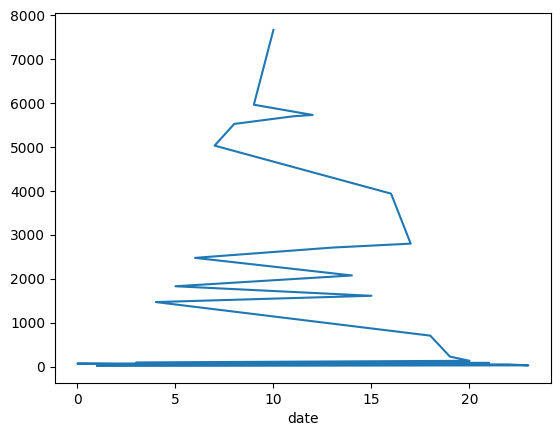

In [19]:
df['date'].dt.hour.value_counts().plot()

     keyword   count
49        vs  162061
44    stocks  161868
13       est  140578
12       eps  128910
42    shares  114182
36   reports  108705
47    update   91680
21    market   90879
10  earnings   87185
37     sales   79524


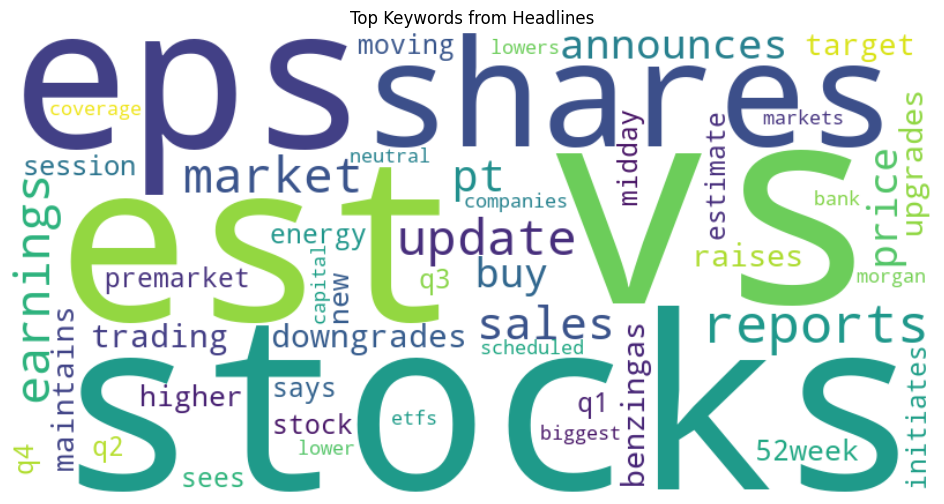

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your DataFrame (assuming it's already named `df`)
# Clean the headlines: lowercase and remove punctuation
df['clean_headlines'] = df['headline'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=50)  # Remove common stopwords, keep top 50 words
X = vectorizer.fit_transform(df['clean_headlines'])

# Get the keywords
keywords = vectorizer.get_feature_names_out()

# Sum word counts across all documents
word_counts = X.toarray().sum(axis=0)

# Create a DataFrame for easy analysis
keyword_freq = pd.DataFrame({'keyword': keywords, 'count': word_counts})
keyword_freq = keyword_freq.sort_values(by='count', ascending=False)

# Display top keywords
print(keyword_freq.head(10))

# Generate a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(keywords, word_counts))
)

# Show the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords from Headlines')
plt.show()


In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # invalid dates become NaT
df = df.dropna(subset=['date'])  # drop rows where date is NaT
df['date_only'] = df['date'].dt.date


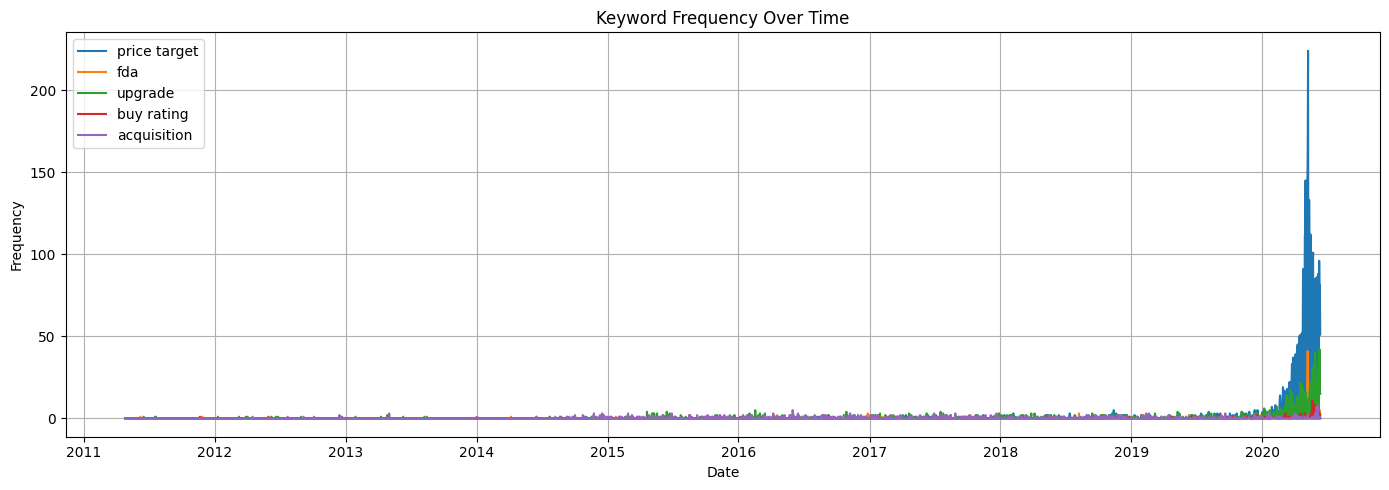

In [14]:
keywords = ['price target', 'fda', 'upgrade', 'buy rating', 'acquisition']
for keyword in keywords:
    df[keyword] = df['headline'].str.lower().str.contains(keyword)

keyword_trend = df.groupby('date_only')[keywords].sum()

# Plot keyword trend
keyword_trend.plot(figsize=(14, 5), title="Keyword Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


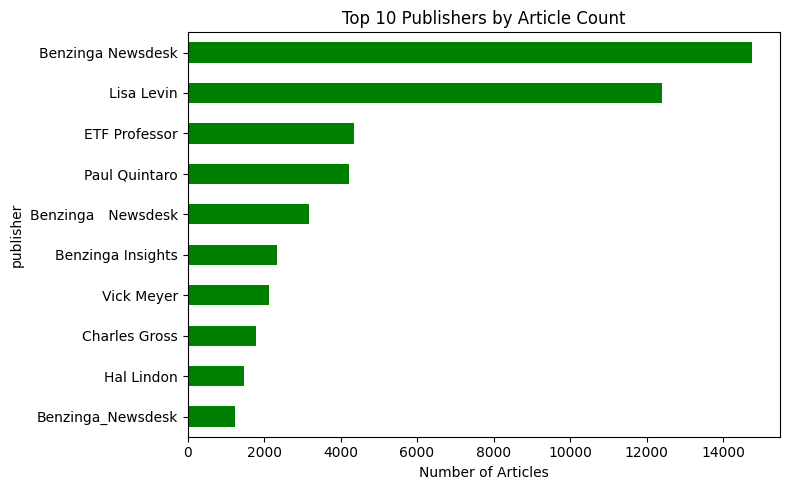

In [15]:
top_publishers = df['publisher'].value_counts().head(10)

plt.figure(figsize=(8, 5))
top_publishers.plot(kind='barh', color='green')
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Number of Articles")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


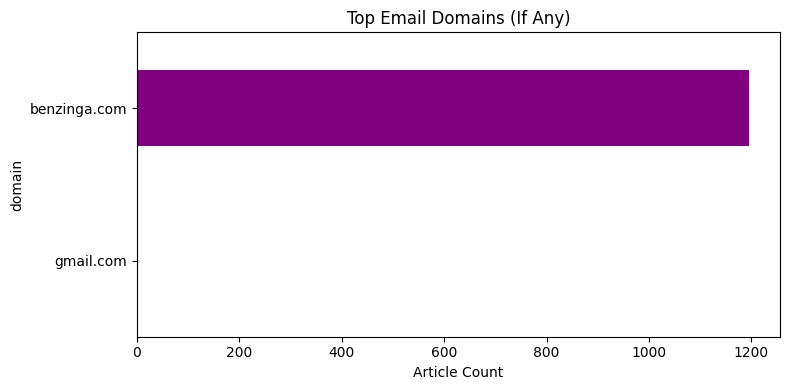

In [16]:
df['domain'] = df['publisher'].str.extract(r'@(.+)$')
domain_counts = df['domain'].value_counts().dropna()

plt.figure(figsize=(8, 4))
domain_counts.head(10).plot(kind='barh', color='purple')
plt.title("Top Email Domains (If Any)")
plt.xlabel("Article Count")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()
